In [ ]:
# Configuration de l’environnement
# Cette section valide : "J’ai importé les librairies nécessaires
# et configuré mon environnement pour l’analyse".
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set()

pd.set_option("display.max_columns", None)


In [ ]:
# Analyse exploratoire des fichiers
# "J’ai chargé et observé séparément chaque fichier de données."
# ------------------------------------------------------------

sirh = pd.read_csv("../data/sirh.csv")
perf = pd.read_csv("../data/performance.csv")
survey = pd.read_csv("../data/survey.csv")



In [ ]:

# Nettoyage des données : 
# "J’ai harmonisé les noms de colonnes et préparé les datasets."
# ------------------------------------------------------------

sirh.columns = sirh.columns.str.lower().str.strip()
perf.columns = perf.columns.str.lower().str.strip()
survey.columns = survey.columns.str.lower().str.strip()

#  Création du DataFrame central : 
# "J’ai fusionné les fichiers pour obtenir un dataset exploitable."
# ------------------------------------------------------------

df = (
    sirh
    .merge(perf, on="employee_id", how="inner")
    .merge(survey, on="employee_id", how="inner")
)

df.head()


,employee_id,age,salary,tenure_years,department,gender,job_level,performance_score,manager_rating,satisfaction_global,work_life_balance,engagement_score,stress_level,has_left
0,1,28,38000,1.2,IT,F,Junior,3.2,3.0,2.5,2.8,3.0,4.2,1
1,2,34,45000,3.5,Finance,M,Intermediate,4.1,4.0,3.8,3.5,4.0,2.1,0
2,3,42,52000,6.8,HR,F,Senior,4.8,5.0,4.5,4.2,4.8,1.9,0
3,4,31,40000,2.0,IT,M,Junior,3.0,2.8,2.9,2.7,3.0,3.9,1
4,5,26,36000,0.8,Marketing,F,Junior,2.5,2.0,2.3,2.1,2.5,4.5,1


In [ ]:
# Analyse descriptive : 
# "J’ai calculé des statistiques descriptives pour comprendre les variables."
# ------------------------------------------------------------

df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employee_id,10.0,NaN,NaN,NaN,5.5,3.02765,1.0,3.25,5.5,7.75,10.0
age,10.0,NaN,NaN,NaN,34.7,6.498718,26.0,29.5,33.5,40.25,45.0
salary,10.0,NaN,NaN,NaN,45500.0,8031.189202,36000.0,39250.0,43500.0,51000.0,60000.0
tenure_years,10.0,NaN,NaN,NaN,3.99,3.116069,0.8,1.4,3.2,6.15,10.0
department,10,4,IT,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10,2,F,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_level,10,3,Junior,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
performance_score,10.0,NaN,NaN,NaN,3.83,0.840701,2.5,3.125,3.95,4.525,4.9
manager_rating,10.0,NaN,NaN,NaN,3.74,1.010171,2.0,3.05,3.75,4.575,5.0
satisfaction_global,10.0,NaN,NaN,NaN,3.51,0.847808,2.3,2.925,3.5,4.2,4.7


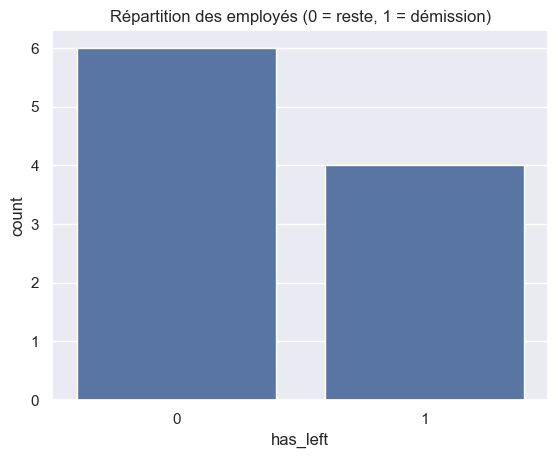

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisations initiales : 
# "J’ai exploré la distribution de la variable cible."
# ------------------------------------------------------------

sns.countplot(data=df, x="has_left")
plt.title("Répartition des employés (0 = reste, 1 = démission)")
plt.show()


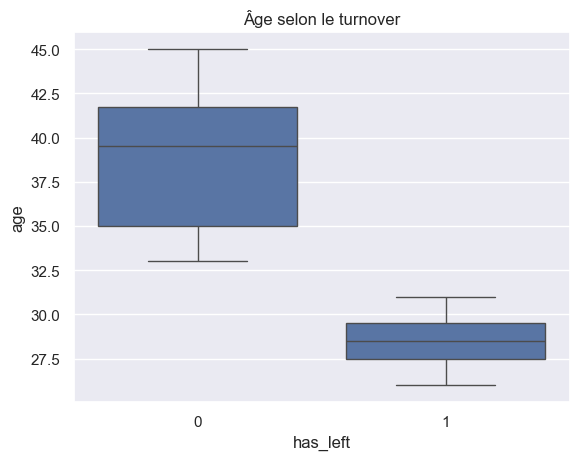

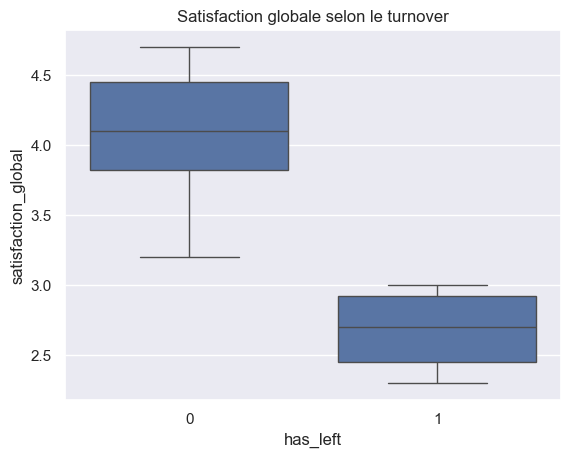

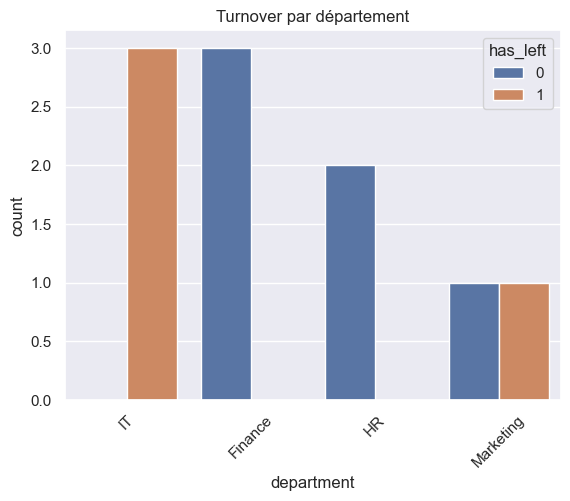

In [ ]:
# Analyse des facteurs liés au turnover : 
# "J’ai comparé les variables explicatives en fonction de la cible."
# ------------------------------------------------------------

# Âge selon turnover

sns.boxplot(data=df, x="has_left", y="age")
plt.title("Âge selon le turnover")
plt.show()

# Satisfaction selon turnover

sns.boxplot(data=df, x="has_left", y="satisfaction_global")
plt.title("Satisfaction globale selon le turnover")
plt.show()

# Turnover par département

sns.countplot(data=df, x="department", hue="has_left")
plt.title("Turnover par département")
plt.xticks(rotation=45)
plt.show()
